In [1]:
%load_ext autoreload

In [5]:
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import os
import pandas as pd
import sys

sys.path.append('/om2/user/eisenaj/code/ChaoticConsciousness')
plt.style.use('sci_style.py')



OSError: 'sci_style.py' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [ ]:
def vdp_damped(t, y, mu, I):
    return [y[1] + I[t, 0], mu*(1-y[0]**2)*y[1]-y[0] + I[t, 1]]

def g_dW(x, scale=1):
    return scale

In [ ]:
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/vdp_damped'

In [ ]:
dt = 0.01 
# t_span = (0, 1000)
t_span = (0, 100)
t_eval = np.arange(t_span[0], t_span[1], dt)
T = len(t_eval)
N = 2

# mu = -0.06
mu = -0.9
I = np.zeros((len(t_eval), 2))
I[50:150] = np.random.randn(2)

x0 = np.random.randn(2)*0.01

dW = np.sqrt(dt) * np.random.randn(T,N)
# Define the function g(x)


# Initialize the x array
x = np.zeros((T, N))
x[0] = x0

# Simulate the stochastic differential equation
for t in range(1, T):
    x[t] = x[t-1] + np.array(vdp_damped(t, x[t-1], mu, I)) * dt + g_dW(x[t-1], scale=0.1) * dW[t]


In [ ]:
# start = 0
# end = 3000
# norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end][-1])
# cmap = plt.get_cmap('rainbow')

# ax = plt.scatter(x[start:end, 0], x[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
# # plt.colorbar(ax=ax)

In [ ]:
# num_saves = np.sum([f"{mu}" in fname for fname in os.listdir(save_dir)])
# if num_saves > 0:
#     pd.to_pickle(x, os.path.join(save_dir, f"{mu}_{num_saves}.pkl"))
# else:
#     pd.to_pickle(x, os.path.join(save_dir, f"{mu}.pkl"))


# Plot Trajectories

In [ ]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end + 1][-1])
cmap = plt.cm.get_cmap('RdYlBu_r')

In [ ]:
mu1 = -0.9
mu2 = -0.06
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/dimensionality_reduction/vdp_damped'
traj1 = pd.read_pickle(os.path.join(save_dir, f"{mu1}.pkl"))
traj2 = pd.read_pickle(os.path.join(save_dir, f"{mu2}.pkl"))

NameError: name 'traj1' is not defined

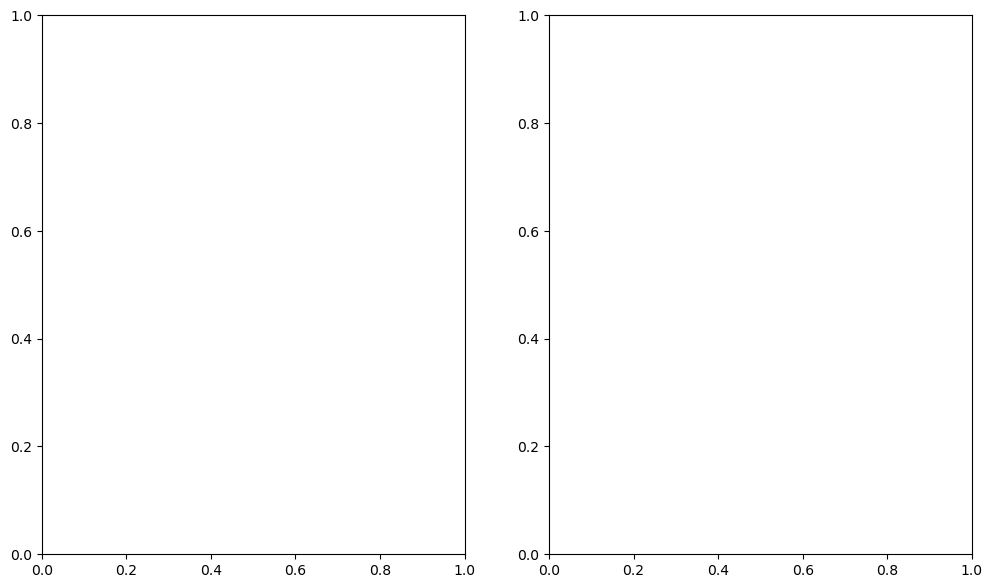

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

ax = axs[0]
ax.grid(False)
ax.scatter(traj1[start:end, 0], traj1[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_ylabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu1}\n(More Stable)', fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)

ax = axs[1]
ax.grid(False)
ax.scatter(traj2[start:end, 0], traj2[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_ylabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu2}\n(Less Stable)', fontsize=16)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1.05, 0.05, 0.02, 0.8])
cbar = fig.colorbar(sm, ticks=[-1, 0.5, 1.5, 10, 20, 30], cax=cbar_ax)
cbar.ax.set_yticklabels([0, 'input on', 'input off', 10, 20, 30], fontsize=15)
cbar.set_label('Time in Trajectory (s)', fontsize=16)

# ax = axs[1]
# plt.colorbar(ax=ax)
plt.suptitle('Noise-Driven Damped Van der Pol Oscillator\nPerturbed by an Input', fontsize=20)
plt.tight_layout()
plt.show()

# Simulate with Two Inputs

In [14]:
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/vdp_damped_two_input'
os.makedirs(save_dir, exist_ok=True)

In [40]:
dt = 0.01 
# t_span = (0, 1000)
t_span = (0, 100)
t_eval = np.arange(t_span[0], t_span[1], dt)
T = len(t_eval)
N = 2

mu = -0.06
# mu = -0.9
I = np.zeros((len(t_eval), 2))
I[50:150] = np.random.randn(2)
I[1550:1650] = np.random.randn(2)

x0 = np.random.randn(2)*0.01

dW = np.sqrt(dt) * np.random.randn(T,N)
# Define the function g(x)


# Initialize the x array
x = np.zeros((T, N))
x[0] = x0

# Simulate the stochastic differential equation
for t in range(1, T):
    x[t] = x[t-1] + np.array(vdp_damped(t, x[t-1], mu, I)) * dt + g_dW(x[t-1], scale=0.1) * dW[t]


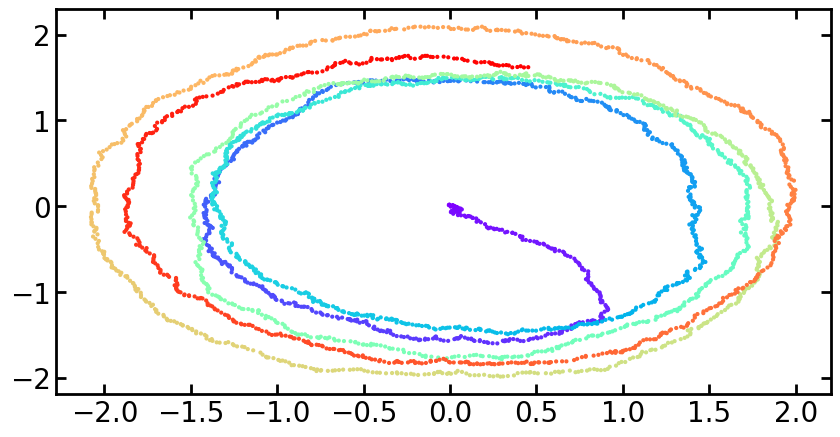

In [41]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end][-1])
cmap = plt.get_cmap('rainbow')

ax = plt.scatter(x[start:end, 0], x[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
# plt.colorbar(ax=ax)

In [42]:
num_saves = np.sum([f"{mu}" in fname for fname in os.listdir(save_dir)])
if num_saves > 0:
    pd.to_pickle(x, os.path.join(save_dir, f"{mu}_{num_saves}.pkl"))
else:
    pd.to_pickle(x, os.path.join(save_dir, f"{mu}.pkl"))


# Plot Trajectories

In [43]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end + 1][-1])
cmap = plt.cm.get_cmap('RdYlBu_r')

In [55]:
mu1 = -0.9
mu2 = -0.06
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/vdp_damped_two_input'
traj1 = pd.read_pickle(os.path.join(save_dir, f"{mu1}_2.pkl"))
traj2 = pd.read_pickle(os.path.join(save_dir, f"{mu2}.pkl"))

/tmp/ipykernel_2800/828576982.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


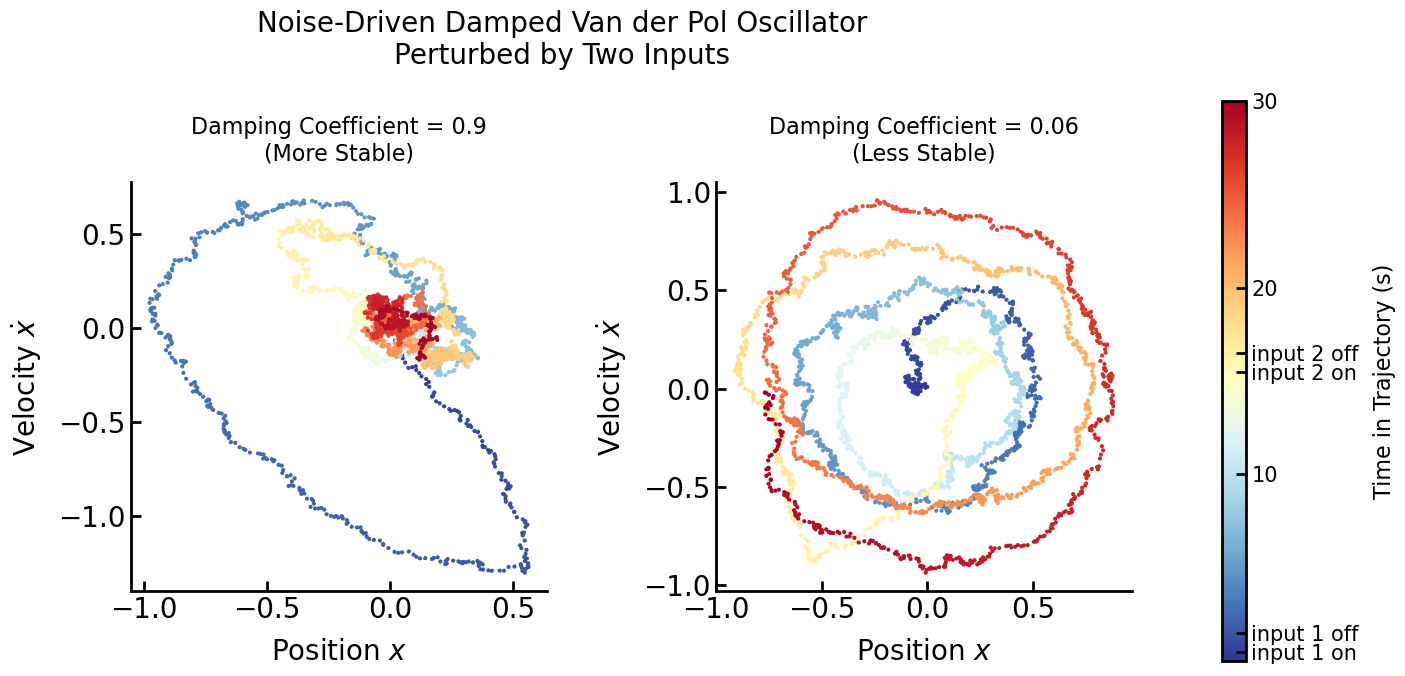

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))

ax = axs[0]
ax.grid(False)
ax.scatter(traj1[start:end, 0], traj1[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_ylabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu1}\n(More Stable)', fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)

ax = axs[1]
ax.grid(False)
ax.scatter(traj2[start:end, 0], traj2[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)
ax.set_xlabel('Position $x$')
ax.set_ylabel('Velocity $\dot{x}$')
ax.set_title(f'Damping Coefficient = {-mu2}\n(Less Stable)', fontsize=16)

ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='y', which='both', left=True, right=False)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1.05, 0.05, 0.02, 0.8])
cbar = fig.colorbar(sm, ticks=[-1, 0.5, 1.5, 10, 15.5, 16.5, 20, 30], cax=cbar_ax)
cbar.ax.set_yticklabels([0, 'input 1 on', 'input 1 off', 10, 'input 2 on', 'input 2 off', 20, 30], fontsize=15)
cbar.ax.set_yticklabels([0, 'input 1 on', 'input 1 off', 10, 'input 2 on', 'input 2 off', 20, 30], fontsize=15)
cbar.set_label('Time in Trajectory (s)', fontsize=16)

# ax = axs[1]
# plt.colorbar(ax=ax)
plt.suptitle('Noise-Driven Damped Van der Pol Oscillator\nPerturbed by Two Inputs', fontsize=20)
plt.tight_layout()
plt.show()

# Plot One input, two input AND time course

In [14]:
start = 0
end = 3000
norm = colors.Normalize(vmin=t_eval[start:end][0], vmax=t_eval[start:end + 1][-1])
cmap = plt.cm.get_cmap('RdYlBu_r')

In [11]:
mu1 = -0.9
mu2 = -0.06
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/dimensionality_reduction/vdp_damped'
traj_one1 = pd.read_pickle(os.path.join(save_dir, f"{mu1}.pkl"))
traj_one2 = pd.read_pickle(os.path.join(save_dir, f"{mu2}.pkl"))
save_dir = '/scratch2/weka/millerlab/eisenaj/ChaoticConsciousness/dimensionality_reduction/vdp_damped_two_input'
traj_two1 = pd.read_pickle(os.path.join(save_dir, f"{mu1}_2.pkl"))
traj_two2 = pd.read_pickle(os.path.join(save_dir, f"{mu2}.pkl"))

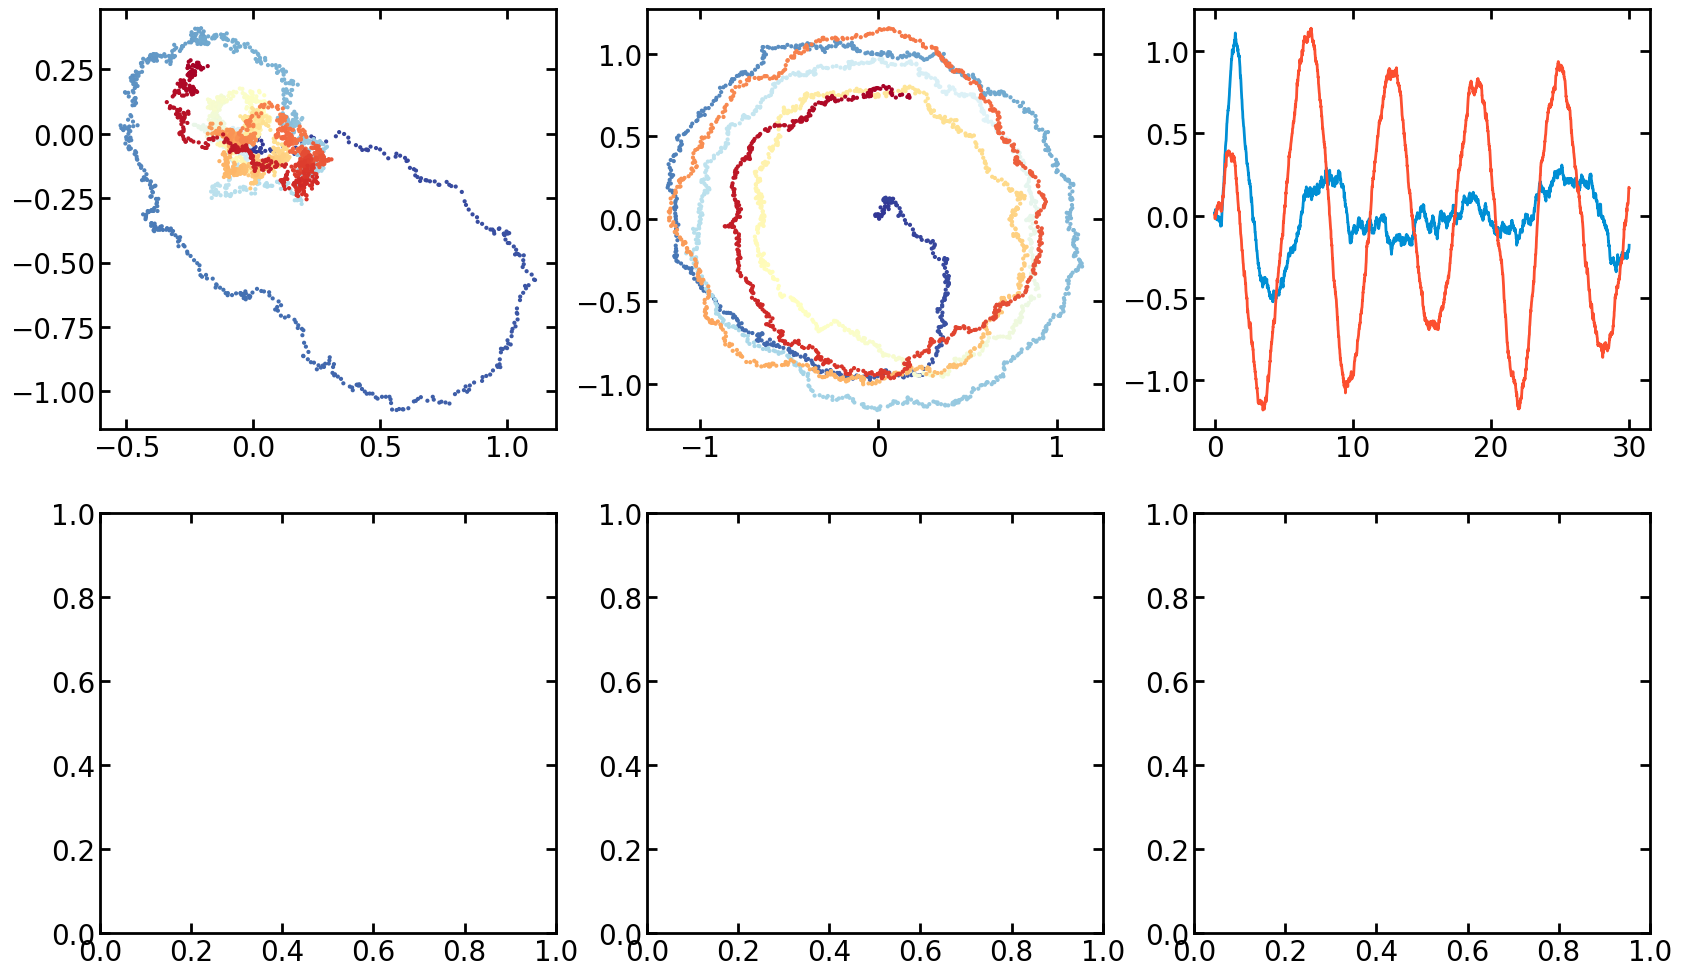

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

ax = axs[0][0]
ax.scatter(traj_one1[start:end, 0], traj_one1[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)

ax = axs[0][1]
ax.scatter(traj_one2[start:end, 0], traj_one2[start:end, 1], c=cmap(norm(t_eval[start:end])), s=4)

ax = axs[0][2]
ax.plot(t_eval[start:end], traj_one1[start:end, 0])
ax.plot(t_eval[start:end], traj_one2[start:end, 0])

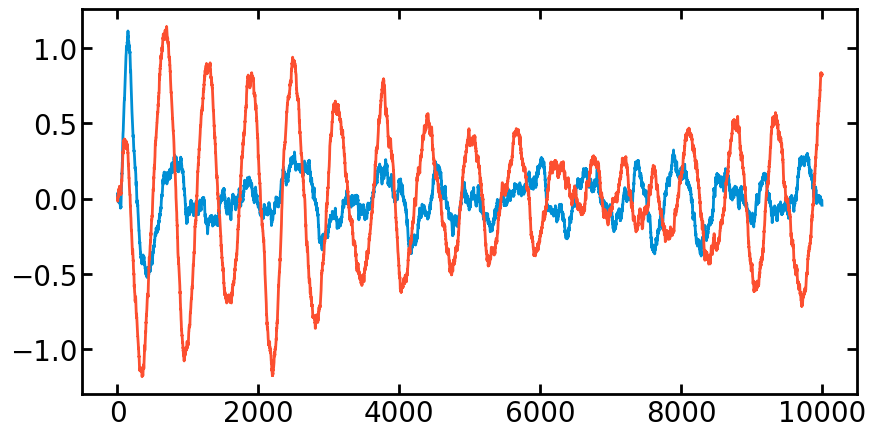

In [13]:
plt.plot(traj_one1[:, 0], label='One Input')
plt.plot(traj_one2[:, 0], label='One Input')